Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



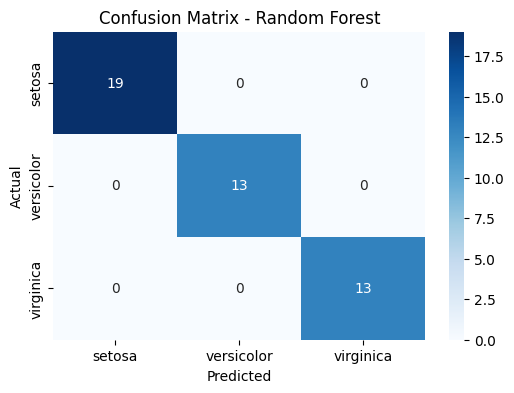

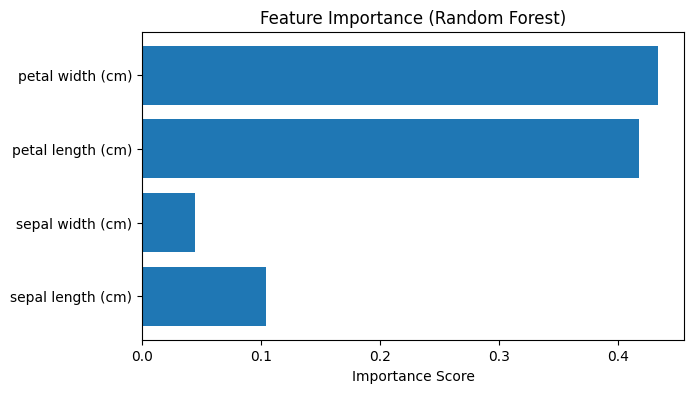

In [1]:
# ----------------------------------------------------
# 1) Import Libraries
# ----------------------------------------------------
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------
# 2) Load Dataset (Iris)
# ----------------------------------------------------
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Dataset Preview:")
print(df.head())

# ----------------------------------------------------
# 3) Split into Features and Target
# ----------------------------------------------------
X = df.iloc[:, :-1]   # first 4 columns
y = df.iloc[:, -1]    # target column

# ----------------------------------------------------
# 4) Train-Test Split
# ----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ----------------------------------------------------
# 5) Build Random Forest Model
# ----------------------------------------------------
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)

# ----------------------------------------------------
# 6) Predictions
# ----------------------------------------------------
y_pred = model.predict(X_test)

# ----------------------------------------------------
# 7) Evaluation
# ----------------------------------------------------
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ----------------------------------------------------
# 8) Confusion Matrix
# ----------------------------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ----------------------------------------------------
# 9) Feature Importance
# ----------------------------------------------------
feature_importance = model.feature_importances_

plt.figure(figsize=(7, 4))
plt.barh(iris.feature_names, feature_importance)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()
